In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
%matplotlib inline

os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

C:\Users\maruf\AppData\Roaming\Python\Python313\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [2]:
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
print(f"Available GPUs: {len(gpu_devices)}")
if gpu_devices:
    tf.config.experimental.set_memory_growth(gpu_devices[0], True)

Available GPUs: 0


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"x_train: {x_train.shape}, y_train: {y_train.shape}")
print(f"x_test: {x_test.shape}, y_test: {y_test.shape}")

x_train: (60000, 28, 28), y_train: (60000,)
x_test: (10000, 28, 28), y_test: (10000,)


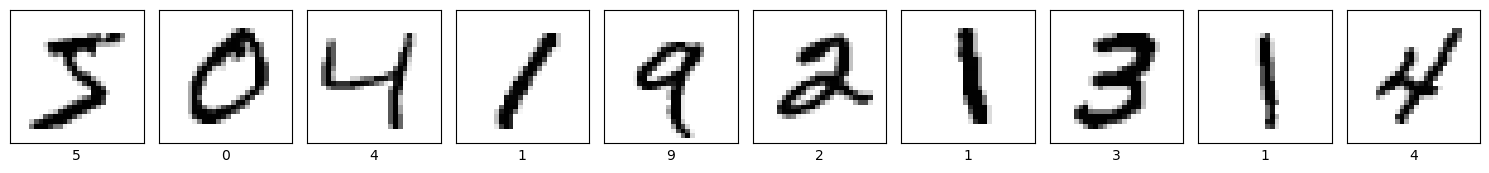

In [4]:
plt.figure(figsize=(15,3))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(x_train[i], cmap='gray_r')
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(y_train[i])
plt.tight_layout()
plt.show()

In [5]:
x_train_flat = x_train.reshape(-1,28*28).astype("float32") / 255.0
x_test_flat  = x_test.reshape(-1,28*28).astype("float32") / 255.0

In [6]:
model = keras.Sequential([
    keras.Input(shape=(28*28,)),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.summary()

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(
    x_train_flat, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.3
)


Epoch 1/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9208 - loss: 0.2730 - val_accuracy: 0.9590 - val_loss: 0.1401
Epoch 2/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9689 - loss: 0.1030 - val_accuracy: 0.9654 - val_loss: 0.1151
Epoch 3/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9794 - loss: 0.0675 - val_accuracy: 0.9658 - val_loss: 0.1134
Epoch 4/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9851 - loss: 0.0487 - val_accuracy: 0.9711 - val_loss: 0.1034
Epoch 5/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9894 - loss: 0.0341 - val_accuracy: 0.9732 - val_loss: 0.0936


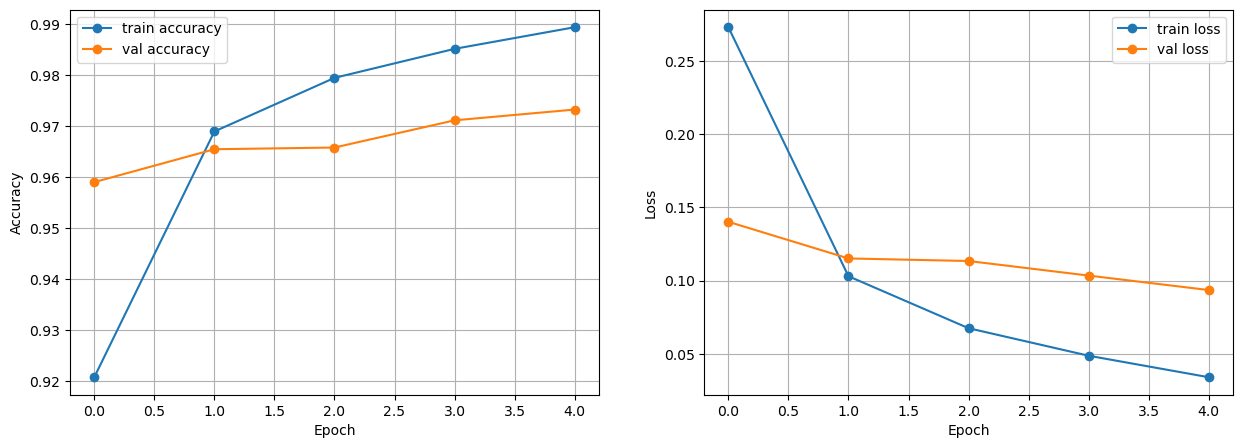

In [8]:

plt.figure(figsize=(15,5))


plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], 'o-', label='train accuracy')
plt.plot(history.history['val_accuracy'], 'o-', label='val accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()


plt.subplot(1,2,2)
plt.plot(history.history['loss'], 'o-', label='train loss')
plt.plot(history.history['val_loss'], 'o-', label='val loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()

plt.show()

In [9]:
test_loss, test_acc = model.evaluate(x_test_flat, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9778 - loss: 0.0757

Test Accuracy: 0.9778


In [10]:
def webcam_predict():
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        print("Camera not opened")
        return

    print("Press 'c' to capture, 'q' to quit.")
    captured_image = None

    while True:
        ret, frame = cap.read()
        if not ret:
            print("Failed to read frame")
            break

        # Box for digit
        cv2.rectangle(frame, (100,100), (300,300), (0,255,0), 2)
        cv2.putText(frame, "Put digit inside box & press C", (40,50),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255,0,0), 2)

        cv2.imshow("Digit Capture", frame)
        key = cv2.waitKey(1) & 0xFF

        if key == ord('c'):
            captured_image = frame[100:300,100:300].copy()
            break
        if key == ord('q'):
            cap.release()
            cv2.destroyAllWindows()
            return

    cap.release()
    cv2.destroyAllWindows()

    
    gray = cv2.cvtColor(captured_image, cv2.COLOR_BGR2GRAY)
    gray = cv2.resize(gray, (28,28))
    gray_flat = gray.reshape(1,28*28).astype("float32") / 255.0

    
    prediction_probs = model.predict(gray_flat)
    predicted_digit = np.argmax(prediction_probs)
    confidence = np.max(prediction_probs)

    print(f"Predicted Digit: {predicted_digit}, Confidence: {confidence:.2f}")
    
    plt.figure()
    plt.imshow(gray, cmap='gray_r')
    plt.title(f"Predicted: {predicted_digit} (Confidence: {confidence:.2f})")
    plt.axis('off')
    plt.show()


Press 'c' to capture, 'q' to quit.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
Predicted Digit: 5, Confidence: 0.98


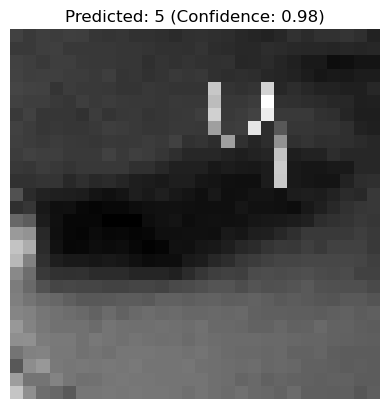

In [11]:
webcam_predict()